In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [29]:
%run helper.py

In [3]:
hiv_train = load_data('./data/training_data.csv', index_col='PatientID')
hiv_test = load_data('./data/test_data.csv', index_col='PatientID')

In [4]:
# class balance
hiv_train.Resp.value_counts()

0    794
1    206
dtype: int64

In [5]:
hiv_train_all_zeros = hiv_train[hiv_train.Resp == 0]

In [6]:
np.random.shuffle(hiv_train_all_zeros.values)

In [7]:
hiv_zeros_for_training = hiv_train_all_zeros.ix[:206]

In [8]:
hiv_zeros_for_training.shape

(206, 5)

In [9]:
training_set = pd.concat([hiv_zeros_for_training, hiv_train[hiv_train.Resp == 1]], axis=0)

In [10]:
training_set.shape

(412, 5)

In [17]:
X = training_set['VL-t0'].values.reshape(-1, 1)
y = training_set['Resp'].values

### Cross validation

In [18]:
from sklearn.linear_model import LogisticRegression

In [48]:
logreg = LogisticRegression(fit_intercept=True, penalty='l1')

In [49]:
test_scores = validation_scores(logreg, X, y, n_iter=10, test_size=0.1)

In [50]:
print 'Min score %.4f, mean score %.4f and max score %.4f' %(test_scores.min(), test_scores.mean(), test_scores.max())

Min score 0.5714, mean score 0.6690 and max score 0.7381


### Validation curves

In [51]:
Cs, train_scores, test_scores = validation_curves(logreg, X, y, n_iter=10, test_size=0.5)

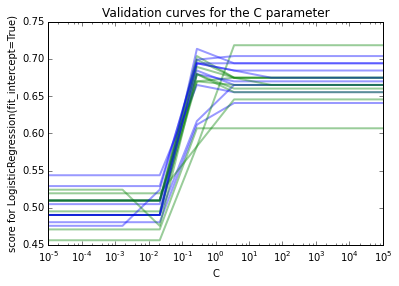

In [52]:
plot_validation_curves(Cs, train_scores, test_scores)

### Seems like value of C=1 produces stable score for the test set